# Crossvalidation Results

In [2]:
%matplotlib inline

from collections import namedtuple

import evaluation.report
import evaluation.plots
import evaluation as evl

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import ntcir
import ntcir.IO as IO

from IPython.display import display

cmap = list(reversed(sns.color_palette("RdBu", 40).as_hex()))
cmap = ListedColormap(cmap)

In [3]:
users = IO.load_annotations(ntcir.filepaths)
categories = IO.load_categories(ntcir.filepaths)

In [4]:
ModelResults = namedtuple('ModelResults', 'name results_dir prefix')

In [5]:
models_results = [ModelResults('VGG-16','results/vgg-16','vgg-16'), 
                  ModelResults('VGG-16+RF on FC1','results/vgg-16','vgg-16.RF.layers_fc1'),
                  ModelResults('VGG-16+RF on FC2','results/vgg-16','vgg-16.RF.layers_fc2'),                  
                  ModelResults('VGG-16+RF on FC1 + FC2','results/vgg-16','vgg-16.RF.layers_fc1_fc2'),
                  ModelResults('VGG-16+RF on FC1 + Predictions','results/vgg-16','vgg-16.RF.layers_predictions_fc1'),
                  ModelResults('ResNet50','results/resNet50','resNet50'),
                  ModelResults('ResNet50+RF on Avg. Pooling','results/resNet50','resNet50.RF.layers_flatten_1'),
                  ModelResults('InceptionV3','results/inceptionV3','inceptionV3'),
                  ModelResults('InceptionV3+RF on Global Avg. Pooling','results/inceptionV3','inceptionV3.RF.layers_global_average_pooling2d_1')]

In [6]:
models = list()
for mr in models_results:
    model = evl.Model(mr.name)
    
    csv_filepaths = evl.get_fold_results(mr.results_dir, mr.prefix)
    for csv_filepath in csv_filepaths:
        number = int(csv_filepath.split('fold_')[1].split('.')[0])
        img_fpaths, gt, preds, probs = evl.read_results(csv_filepath)
        model.folds.append(evl.Fold(number, img_fpaths, gt, preds, probs))
    model.evaluate()    
    models.append(model)

In [7]:
performance = evl.report.ClassificationComparisonTable(categories, models)
display(performance)

Activity,InceptionV3,InceptionV3+RF on Global Avg. Pooling,ResNet50,ResNet50+RF on Avg. Pooling,VGG-16,VGG-16+RF on FC1,VGG-16+RF on FC1 + FC2,VGG-16+RF on FC1 + Predictions,VGG-16+RF on FC2
Public Transport,89.23,91.08,92.41,91.01,89.17,90.37,90.82,91.53,91.33
Driving,99.60,99.87,99.90,99.93,99.50,99.80,99.80,99.83,99.80
Walking outdoor,90.95,97.20,94.61,97.90,90.89,97.55,97.15,97.12,97.15
Walking indoor,79.17,94.86,92.73,94.98,79.63,94.69,94.75,94.63,94.58
Biking,91.93,97.57,99.17,97.15,92.32,97.57,97.97,97.97,97.97
Drinking together,80.74,95.77,94.93,94.71,89.42,95.70,95.70,95.56,95.56
Drinking/eating alone,75.94,91.34,88.25,89.34,74.92,89.28,89.59,89.70,89.40
Eating together,80.58,96.03,96.42,97.17,88.78,97.07,97.26,96.98,97.26
Socializing,89.13,97.75,97.47,98.52,91.60,98.24,98.57,98.35,98.57
Attending a seminar,78.70,78.11,80.57,78.11,76.93,78.31,78.11,78.31,78.11


/home/alejandro/.local/lib/python2.7/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


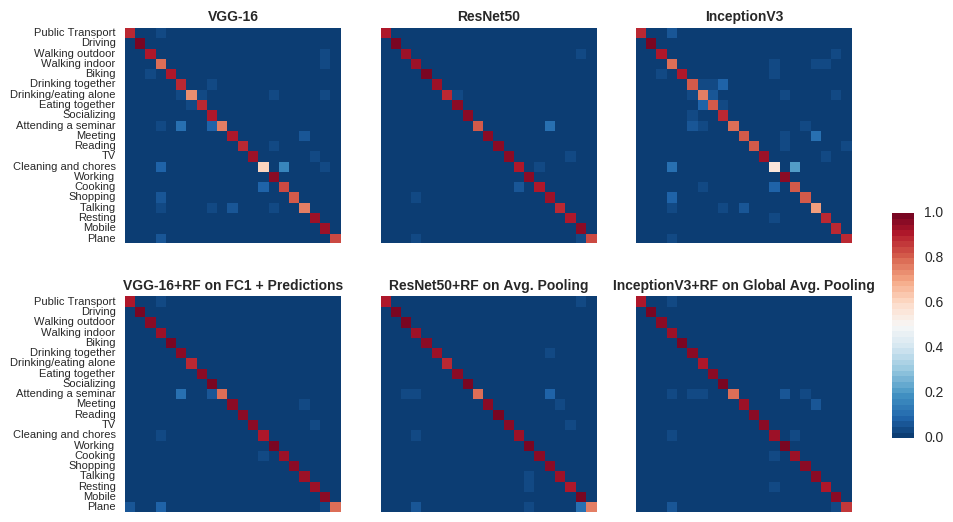

In [8]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

reload(evaluation.plots)

models_to_show = [models[i] for i in [0,5,7,4,6,8]]
fig, ax = evl.plots.show_cms(models_to_show, categories, figsize=(9,6), cmap=cmap, ticks_size=8, num_rows=2, num_cm_row=3)
plt.savefig('confusion_matrices.eps', format='eps', dpi=300)

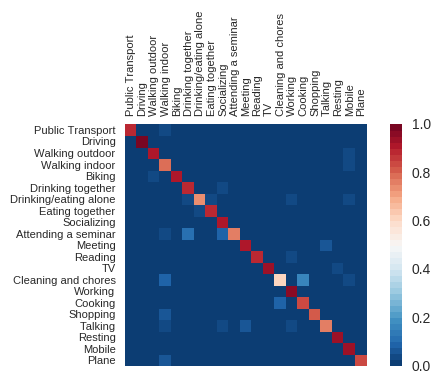

In [9]:
fig, ax = evl.plots.cm(models[0].confusion_matrix, categories, (5,4), 
                       cmap=cmap, ticks_size=8, show_xticks=True, show_yticks=True, cbar=True)
plt.savefig('confusion_matrix.eps', format='eps', dpi=300)

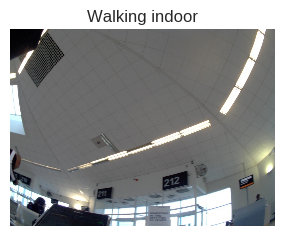

#,Activity,Score
1,Working,0.5186390877
2,Talking,0.2137302160
3,Walking indoor,0.0926
4,Meeting,0.0773071796
5,Attending a seminar,0.0572543330


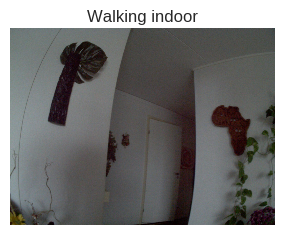

#,Activity,Score
1,Talking,0.4754579365
2,Walking indoor,0.4435
3,Mobile,0.0341356583
4,Socializing,0.0177672803
5,Cleaning and chores,0.0097820815


In [28]:
base_model = models[0]
rf_model = models[4]
predictions = evl.report.get_predictions_comparison(base_model, rf_model)
evl.report.show_top_scores(categories, base_model, rf_model, predictions.better[:2])